##  Rent a Bike for Hike !

## Problem Statement

The process of renting bikes has been automated wherein the whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.



## About the DataSet :

day.csv - bike rentals aggregated on daily basis. Number of Records: 731 days

|Features|Description|
|-----|-----|
|instant| record index|
|season  | season (1:springer, 2:summer, 3:fall, 4:winter)|
|yr | year (0: 2011, 1:2012)|
|mnth | month ( 1 to 12)|
|holiday | weather day is holiday or not(extracted from http://dchr.dc.gov/page/holiday-schedule)|
|weekday | day of the week|
|workingday | if day is neither weekend nor holiday is 1, otherwise is 0.|
|weathersit |1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mi<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
|temp | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)|
|atemp | Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)|
|hum | Normalized humidity. The values are divided to 100 (max)|
|windspeed | Normalized wind speed. The values are divided to 67 (max)|
|casual | count of casual users|
|registered| count of registered users|
|cnt | count of total rental bikes including both casual and registered|
 

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

### Load the data

In [24]:
dataframe = pd.read_csv('day.csv')
dataframe.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
data=dataframe
data.head(50)
# b=data[(data['mnth']==1)]
# b
data.head(3)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [26]:
data.rename(columns={'cnt':'bike_count'}, inplace=True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bike_count
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Plot the distribution of target variable

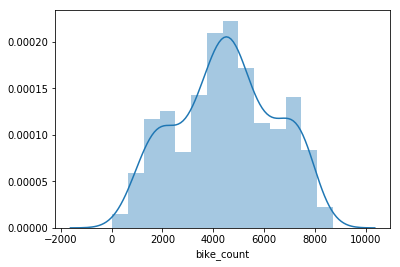

In [27]:
#Histogram
sns.distplot(data['bike_count'])

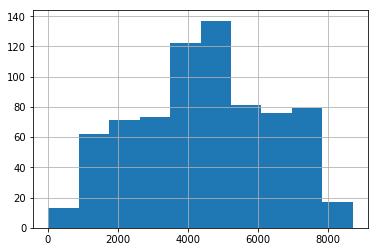

In [28]:
data['bike_count'].hist()

### Check the skewness of numerical columns by plotting histograms.

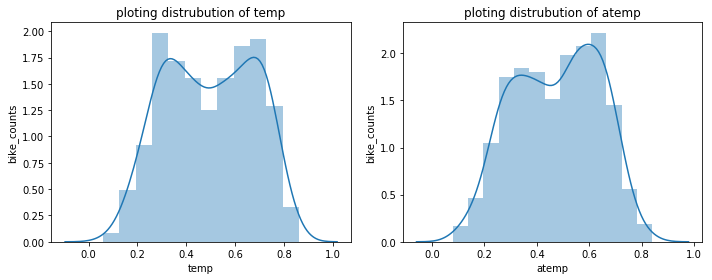

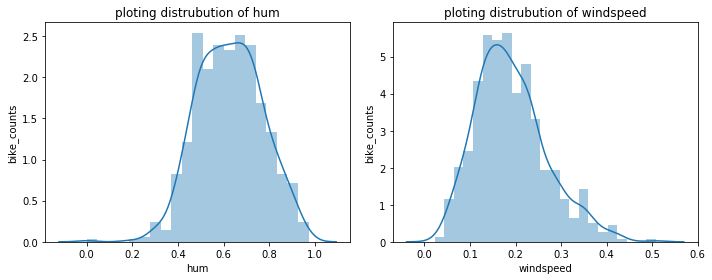

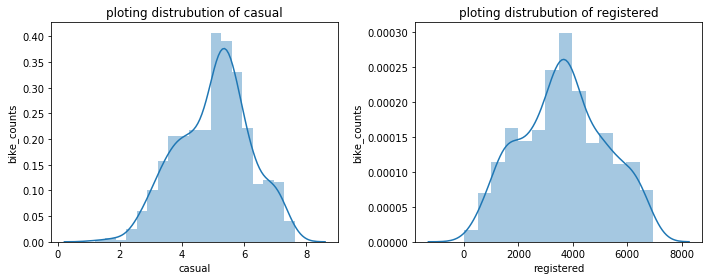

In [52]:
numerical = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
for i in range(0,len(numerical),2):
    if len(numerical) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(data[numerical[i]])
        plt.title('ploting distrubution of '+numerical[i])
        plt.xlabel(numerical[i])
        plt.ylabel('bike_counts')
        plt.subplot(122)
        sns.distplot(data[numerical[i+1]])
        plt.title('ploting distrubution of '+numerical[i+1])
        plt.xlabel(numerical[i+1])
        plt.ylabel('bike_counts')
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(data[numerical[i]],data['bike_count'])

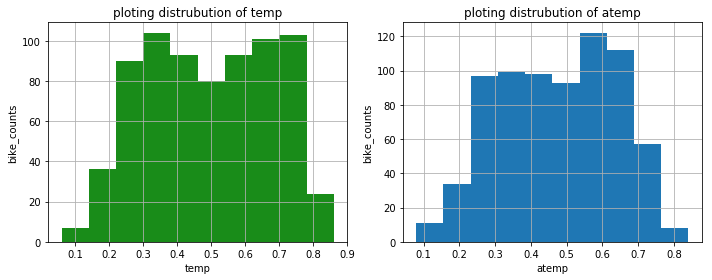

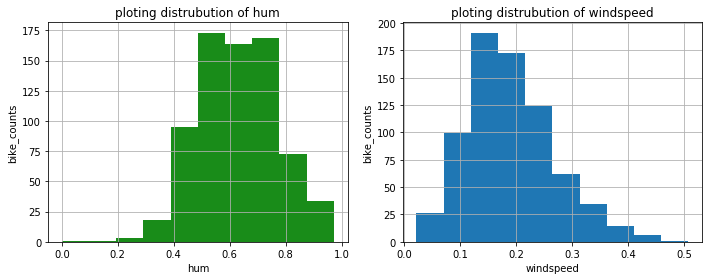

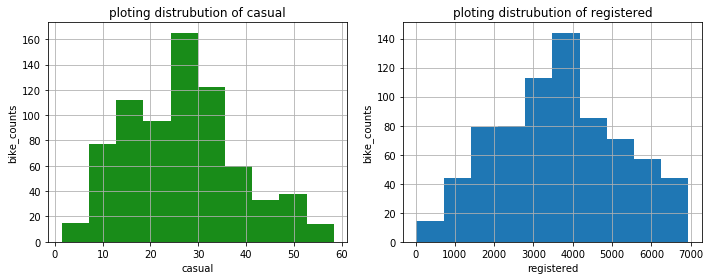

In [39]:
numerical = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
for i in range(0,len(numerical),2):
    if len(numerical) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        data[numerical[i]].hist(facecolor='green',alpha=0.9)
        plt.title('ploting distrubution of '+numerical[i])
        plt.xlabel(numerical[i])
        plt.ylabel('bike_counts')
        plt.subplot(122)
        data[numerical[i+1]].hist()
        plt.title('ploting distrubution of '+numerical[i+1])
        plt.xlabel(numerical[i+1])
        plt.ylabel('bike_counts')
        plt.tight_layout()
        plt.show()
    

### Remove the skewness from the feature `casual` using a square root transform and plot a histogram to check for the same

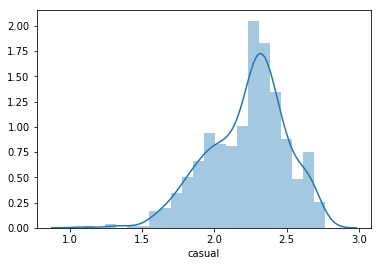

In [58]:
data['casual'] = data['casual'].apply(lambda x:np.sqrt(x))
#Histogram
sns.distplot(data['casual'])

### Plot bivariate distribution of target against all  the continous features i.e("temp",	"atemp",	"hum",	"windspeed").

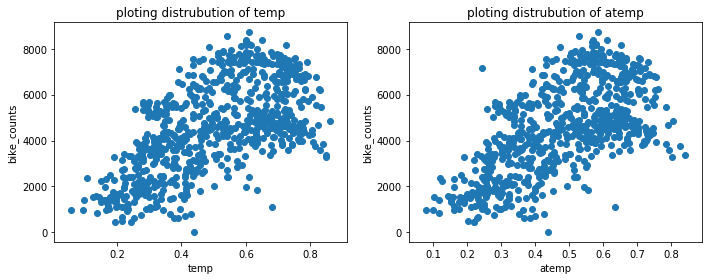

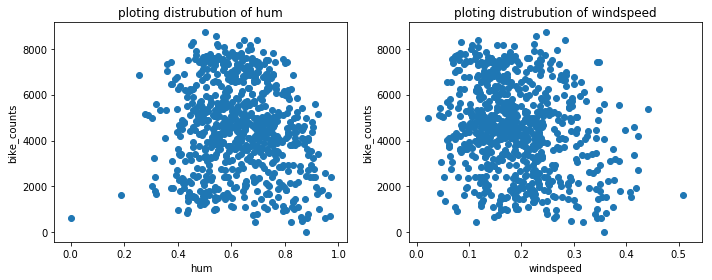

In [47]:
numerical = ["temp", "atemp", "hum", "windspeed"]
for i in range(0,len(numerical),2):
    if len(numerical) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        plt.scatter(data[numerical[i]],data['bike_count'])
        plt.title('ploting distrubution of '+numerical[i])
        plt.xlabel(numerical[i])
        plt.ylabel('bike_counts')
        plt.subplot(122)
        plt.scatter(data[numerical[i+1]],data['bike_count'])
        plt.title('ploting distrubution of '+numerical[i+1])
        plt.xlabel(numerical[i+1])
        plt.ylabel('bike_counts')
        plt.tight_layout()
        plt.show()
    

### Plot bivariate distribution of target against all the categorical features i.e("season", "mnth", "holiday", "weekday", "workingday","weathersit").

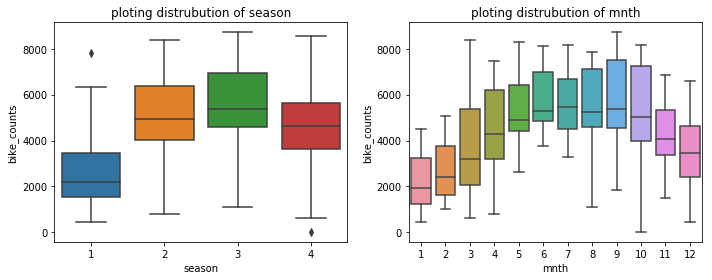

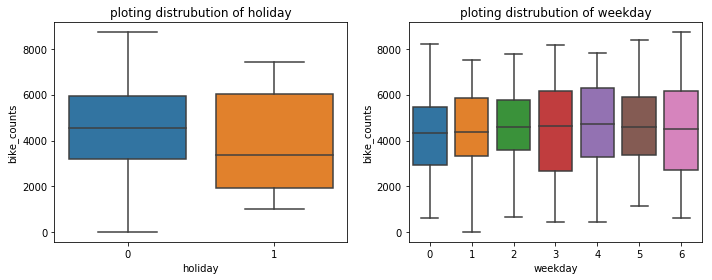

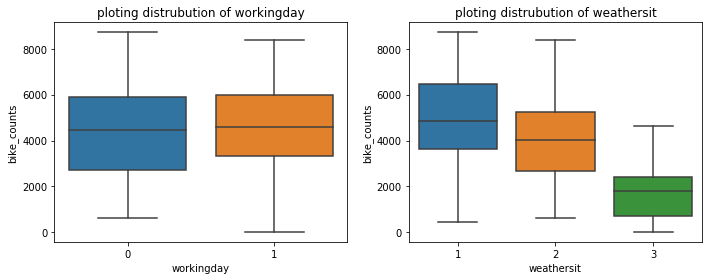

In [57]:
cat = ["season", "mnth", "holiday", "weekday", "workingday","weathersit"]
for i in range(0,len(cat),2):
    if len(cat) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(data[cat[i]],data['bike_count'])
        plt.title('ploting distrubution of '+cat[i])
        plt.xlabel(cat[i])
        plt.ylabel('bike_counts')
        plt.subplot(122)
        sns.boxplot(data[cat[i+1]],data['bike_count'])
        plt.title('ploting distrubution of '+cat[i+1])
        plt.xlabel(cat[i+1])
        plt.ylabel('bike_counts')
        plt.tight_layout()
        plt.show()

###  Plot the correlation plot between continous features using heat map

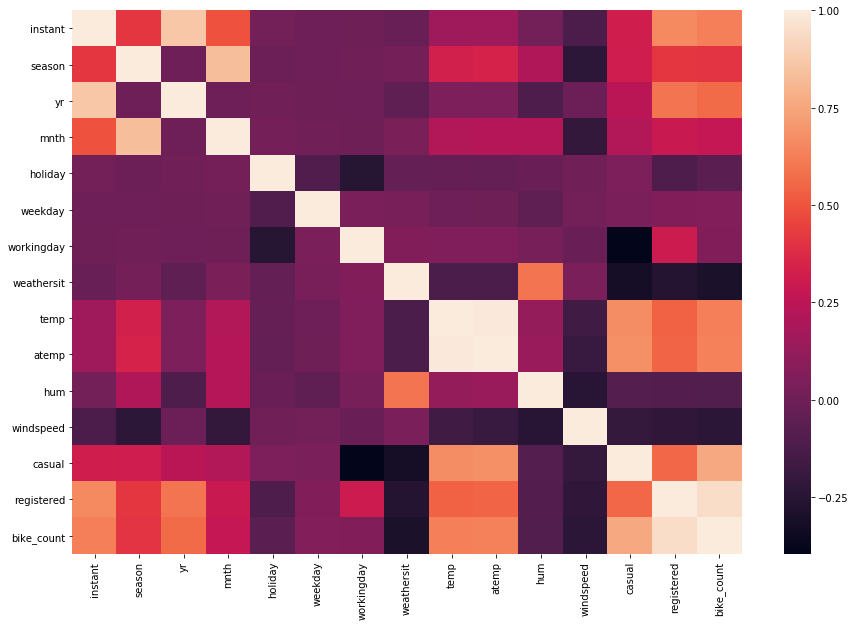

In [65]:
corro= data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corro)

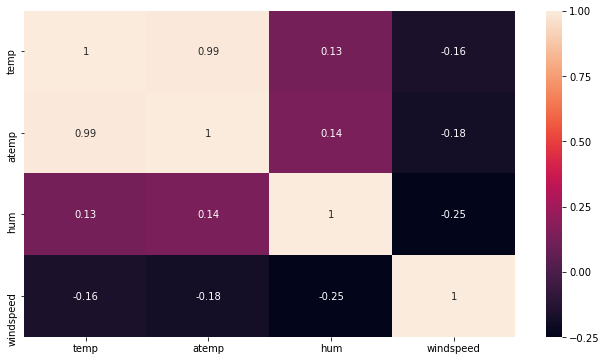

In [74]:
corro=dataframe[["temp", "atemp", "hum", "windspeed"]].corr()
plt.figure(figsize=(11,6))
sns.heatmap(corro, annot=True)

###  Perform Scaling using MinMaxScaler on the features `casual` and `registered`
Most of the times, the dataset will contain features that are highly varying in magnitudes, units and range.Without normalization the results will vary greatly between different units. So, we need to bring all features to the same level of magnitudes by scaling the features.


In [84]:
scaler = MinMaxScaler()
data['casual'] = pd.DataFrame(scaler.fit_transform(data[['casual']]))
data['registered'] = pd.DataFrame(scaler.fit_transform(data[['registered']]))
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bike_count
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0.582352,0.091539,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0.447363,0.093849,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0.435382,0.174560,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,0.421162,0.207046,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,0.384862,0.216286,1600


### Drop the column i.e("instant") and then split the Features into predictor and target.
We have dropped the column `instant` because it is the index. 

In [85]:
X = dataframe.drop(['instant','bike_count'],1)  #target also drop in test i.e. bike_count
#target variable should be Y
Y = dataframe['bike_count'].copy()
#random should be fixed for replicate dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)  

In [94]:
X = dataframe.drop(["instant","bike_count"],1)
y = dataframe["bike_count"].copy()

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size =0.2 , random_state = 42)

### Create a baseline regression model 

In [86]:
lr = LinearRegression()
lr.fit(X_train, Y_train) #Trainning set learning
y_pred = lr.predict(X_test) #prediction save

In [95]:
lr  = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

### Plot the Residuals
Residuals are defined as the distance between actual and predicted target values. With the help of the histogram, visualize the residuals obtained. 

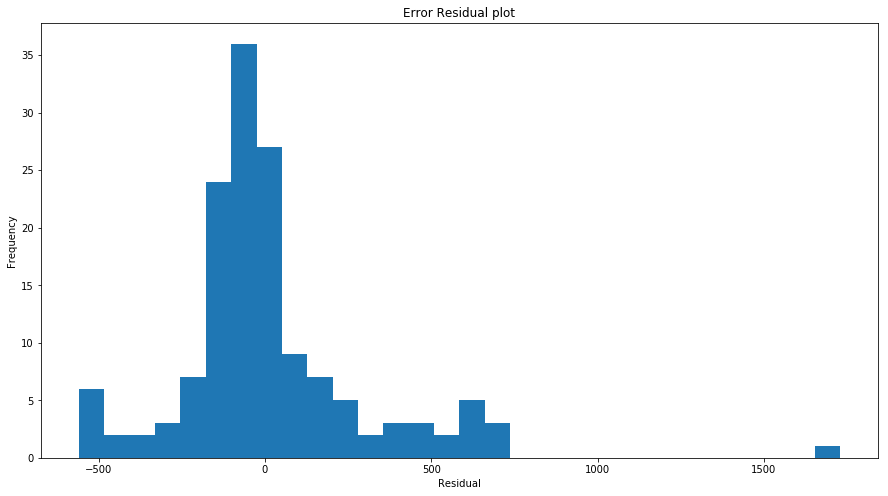

In [96]:
residual = (y_val - y_pred)
plt.figure(figsize=(15,8))
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency") 
plt.title("Error Residual plot")
plt.show()

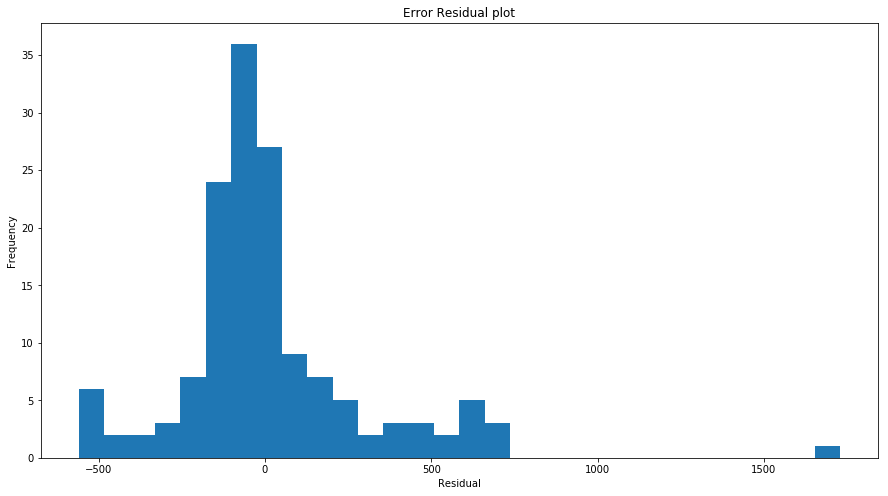

In [93]:
residual = (Y_test - y_pred)
plt.figure(figsize=(15,8))
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency") 
plt.title("Error Residual plot")
plt.show()

### Evaluate the above model using error metrics.
Linear Regression error metrics are `RMSE` , `R2_SCORE` , `MAE`.  

In [91]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print('Root Mean Squared Error: ',rmse)
print('R2_score: ',r2_score(Y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(Y_test,y_pred))

Root Mean Squared Error:  287.3800406915159
R2_score:  0.97940406180426
Mean Absolute Error:  185.24294141850928
